In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.1/122.1 kB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 121.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 121.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 113.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=eaf3ead87eb222d55

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.1 MB/s eta 0:00:00a 0:00:01


# Analysis of clusters in sample S3

In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

In [2]:
import importlib

## Preprocessing
### Read data

In [3]:
data_gene = sc.read_h5ad("../../data/MOBA_scRNAseq/outs_S3/filtered_data_maxpool_processed.h5ad")


/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


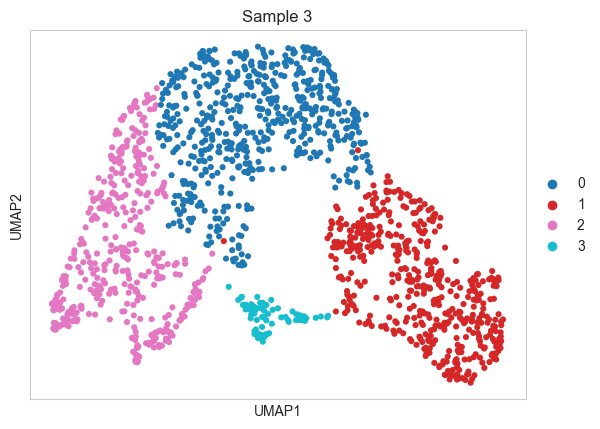

In [4]:
sc.tl.leiden(data_gene, resolution=0.15, key_added="leiden_opt", random_state=1234)
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Initial DE testing: Wilcoxon rank-sum for every cluster against all others

/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[grou

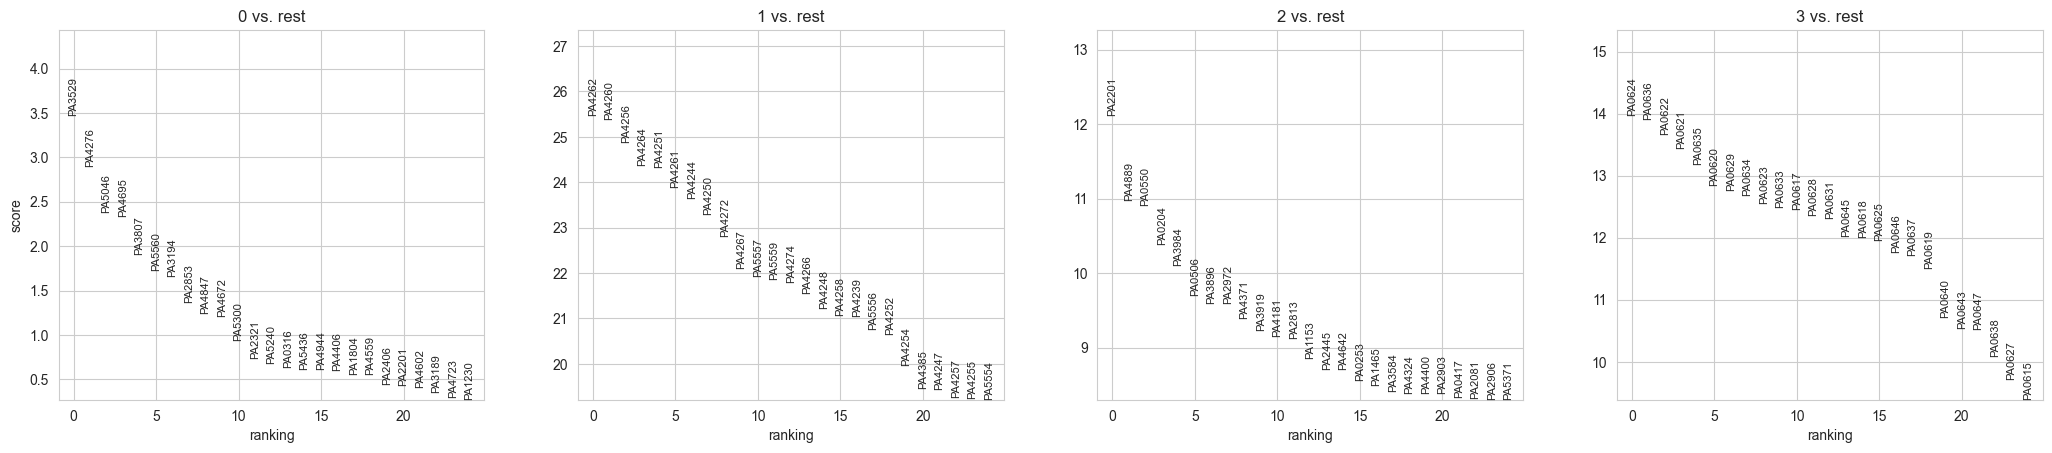

In [5]:
sc.tl.rank_genes_groups(data_gene, 'leiden_opt', method='wilcoxon')
sc.pl.rank_genes_groups(data_gene, n_genes=25, sharey=False)

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [6]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB a

## Find optimal correlation matrix scaling and generate synthetic null data

In [225]:
importlib.reload(cd)
xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
print(xmin)

KeyboardInterrupt: 

In [226]:
importlib.reload(cd)

data_gen_noscale, R_est_noscale = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, corr_factor=1,
                                                  R_est=None, check_pd=True)


xmin = 1.2360679772046799

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [227]:
importlib.reload(cd)
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True,
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)

In [228]:
data_gene.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAGTGGACCTC-1                395                 5.981414         485.0   
AAACCCATCCTGTAGA-1                558                 6.326149         863.0   
AAACGCTCAGATTTCG-1                398                 5.988961         491.0   
AAACGCTTCTTTGCTA-1                598                 6.395262        1013.0   
AAAGAACCAGTCTGGC-1                897                 6.800170        1190.0   
...                               ...                      ...           ...   
TTTGATCTCCTCGCAT-1                592                 6.385194         924.0   
TTTGGAGCACCGAATT-1               1930                 7.565793        5446.0   
TTTGGAGCAGCAGTTT-1                604                 6.405228         748.0   
TTTGGTTTCGTTGTGA-1                371                 5.918894         470.0   
TTTGTTGAGTAATACG-1               1611                 7.385231        2372.0   

                    log1p_total_counts  outlier  n_genes  total_counts_norm  \
AAACCCAGTGGACCTC-1            6.186209    False      395       -5520.855399   
AAACCCATCCTGTAGA-1            6.761573    False      558       -5537.830350   
AAACGCTCAGATTTCG-1            6.198479    False      398       -5514.955366   
AAACGCTTCTTTGCTA-1            6.921658    False      598       -5551.147550   
AAAGAACCAGTCTGGC-1            7.082549    False      897       -5367.476470   
...                                ...      ...      ...                ...   
TTTGATCTCCTCGCAT-1            6.829794    False      592       -5548.655895   
TTTGGAGCACCGAATT-1            8.602820    False     1930       -5396.344149   
TTTGGAGCAGCAGTTT-1            6.618739    False      604       -5441.733687   
TTTGGTTTCGTTGTGA-1            6.154858    False      371       -5557.570027   
TTTGTTGAGTAATACG-1            7.771910    False     1611       -5187.456390   

                    total_counts_scale embedding_reliability  \
AAACCCAGTGGACCTC-1         -306.783556           trustworthy   
AAACCCATCCTGTAGA-1         -352.602239           trustworthy   
AAACGCTCAGATTTCG-1         -275.321721             undefined   
AAACGCTTCTTTGCTA-1         -392.325843           trustworthy   
AAAGAACCAGTCTGGC-1          331.842451             undefined   
...                                ...                   ...   
TTTGATCTCCTCGCAT-1         -368.312233           trustworthy   
TTTGGAGCACCGAATT-1          145.205548             undefined   
TTTGGAGCAGCAGTTT-1           59.660240           trustworthy   
TTTGGTTTCGTTGTGA-1         -420.193534             undefined   
TTTGTTGAGTAATACG-1          929.659340           trustworthy   

                    reliability_score  null_reliability_score leiden_opt  
AAACCCAGTGGACCTC-1           0.556917                0.082263          0  
AAACCCATCCTGTAGA-1           0.779740                0.377085          1  
AAACGCTCAGATTTCG-1           0.428113                0.189363          0  
AAACGCTTCTTTGCTA-1           0.619388                0.313508          1  
AAAGAACCAGTCTGGC-1           0.435914                0.547812          2  
...                               ...                     ...        ...  
TTTGATCTCCTCGCAT-1           0.587962                0.109356          1  
TTTGGAGCACCGAATT-1           0.094703                0.589108          1  
TTTGGAGCAGCAGTTT-1           0.605096                0.301052          2  
TTTGGTTTCGTTGTGA-1           0.427874                0.405871          1  
TTTGTTGAGTAATACG-1           0.576844                0.045838          2  

[1544 rows x 12 columns]

In [229]:
data_null_gen.layers["counts"] = data_null_gen.X.copy()
data_null_gen.var["var_counts_unscaled"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts_unscaled"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["total_counts_unscaled"] = np.asarray(np.sum(data_null_gen.X, axis=0)).squeeze()

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
data_null_gen.X = np.ceil(data_null_gen.X / (data_null_gen.obs["total_counts"].values)[:, np.newaxis] * (data_gene.obs["total_counts"].values)[:, np.newaxis])
data_null_gen.layers["scaled_counts"] = data_null_gen.X.copy()


In [230]:
sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [231]:
data_null_gen.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAGTGGACCTC-1               1259                 7.138867        1379.0   
AAACCCATCCTGTAGA-1               1493                 7.309212        1744.0   
AAACGCTCAGATTTCG-1                526                 6.267201         783.0   
AAACGCTTCTTTGCTA-1                545                 6.302619        1375.0   
AAAGAACCAGTCTGGC-1                932                 6.838405        1428.0   
...                               ...                      ...           ...   
TTTGATCTCCTCGCAT-1               1014                 6.922644        1493.0   
TTTGGAGCACCGAATT-1                709                 6.565265        5508.0   
TTTGGAGCAGCAGTTT-1                443                 6.095825        1002.0   
TTTGGTTTCGTTGTGA-1                865                 6.763885        1007.0   
TTTGTTGAGTAATACG-1                756                 6.629363        2785.0   

                    log1p_total_counts  
AAACCCAGTGGACCTC-1            7.229839  
AAACCCATCCTGTAGA-1            7.464510  
AAACGCTCAGATTTCG-1            6.664409  
AAACGCTTCTTTGCTA-1            7.226936  
AAAGAACCAGTCTGGC-1            7.264730  
...                                ...  
TTTGATCTCCTCGCAT-1            7.309212  
TTTGGAGCACCGAATT-1            8.614138  
TTTGGAGCAGCAGTTT-1            6.910751  
TTTGGTTTCGTTGTGA-1            6.915723  
TTTGTTGAGTAATACG-1            7.932362  

[1544 rows x 4 columns]

In [232]:
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

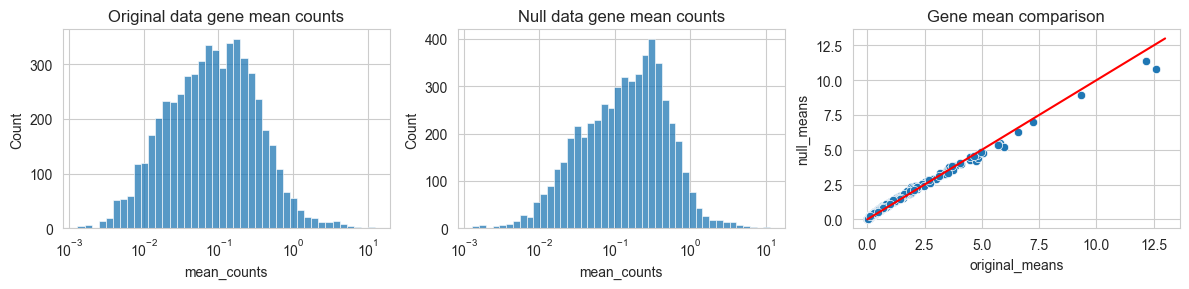

SignificanceResult(statistic=0.9949973245414863, pvalue=0.0)


In [233]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

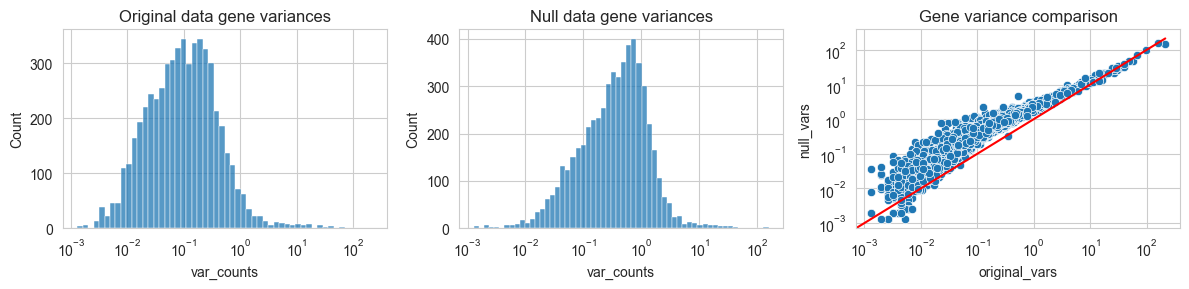

SignificanceResult(statistic=0.9683623073406857, pvalue=0.0)
[[1.         0.97571726]
 [0.97571726 1.        ]]


In [234]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

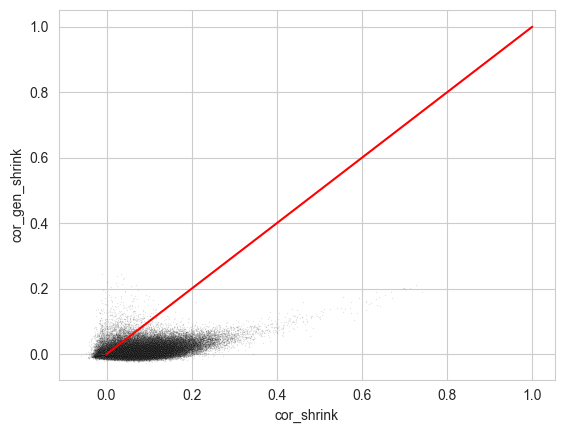

In [235]:
cor_orig = spearmanr(data_gene_nonzero.layers["counts"].toarray()).statistic
cor_orig = pd.DataFrame(cor_orig, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen = spearmanr(data_null_gen.X).statistic
cor_gen = pd.DataFrame(cor_gen, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_orig": cor_orig.values.flatten(), "cor_gen": cor_gen.values.flatten(), "cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})
all_cors["ratio"] = all_cors["cor_orig"]/all_cors["cor_gen"]

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_orig'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1, color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_orig']))], [0, np.ceil(np.max(all_cors_subset['cor_orig']))], color="red")
plt.show()

### Process null data

In [236]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts_scaled"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts_scaled"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [237]:
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform", layer="counts")
for val in ["nb_mean", "nb_overdisp", "nb_overdisp_cutoff", "nb_umi", "Intercept_step1_sct", "log_umi_step1_sct", "dispersion_step1_sct"]:
    data_null_gen.var[f"{val}_unscaled"] = data_null_gen.var[val]

Index(['Intercept_sct', 'log_umi_sct', 'theta_sct', 'is_scd_outlier_sct',
       'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct',
       'genes_step1_sct', 'log10_gmean_sct', 'is_scd_outlier'],
      dtype='object')


In [238]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform")

k_opt = 3
n_neighbors_opt = 50
min_dist_opt = 0.3
res_opt = 0.15

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


Index(['Intercept_sct', 'log_umi_sct', 'theta_sct', 'is_scd_outlier_sct',
       'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct',
       'genes_step1_sct', 'log10_gmean_sct', 'is_scd_outlier'],
      dtype='object')


In [239]:
data_null_gen.var

var_counts_unscaled  mean_counts_unscaled  total_counts_unscaled  \
PAO1_ID                                                                     
PA0001              0.886218              0.712435                 1100.0   
PA0002              0.732586              0.523964                  809.0   
PA0003              1.197131              0.913212                 1410.0   
PA0004              0.465569              0.400907                  619.0   
PA0005              0.141982              0.141192                  218.0   
...                      ...                   ...                    ...   
PA5566              0.013450              0.012306                   19.0   
PA5567              0.197106              0.147668                  228.0   
PA5568              0.703791              0.642487                  992.0   
PA5569             12.061295              3.599741                 5558.0   
PA5570              0.795820              0.471503                  728.0   

         n_cells_by_counts  mean_counts  log1p_mean_counts  \
PAO1_ID                                                      
PA0001                 729     0.885363           0.634120   
PA0002                 555     0.598446           0.469032   
PA0003                 832     1.038860           0.712391   
PA0004                 478     0.495466           0.402438   
PA0005                 203     0.212435           0.192631   
...                    ...          ...                ...   
PA5566                  18     0.017487           0.017336   
PA5567                 180     0.215674           0.195298   
PA5568                 700     0.797927           0.586635   
PA5569                1297     3.323187           1.463993   
PA5570                 463     0.538212           0.430621   

         pct_dropout_by_counts  total_counts  log1p_total_counts  var_counts  \
PAO1_ID                                                                        
PA0001               52.784974        1367.0            7.221105    2.418853   
PA0002               64.054404         924.0            6.829794    1.363365   
PA0003               46.113990        1604.0            7.380879    2.243309   
PA0004               69.041451         765.0            6.641182    1.033658   
PA0005               86.852332         328.0            5.796058    0.461348   
...                        ...           ...                 ...         ...   
PA5566               98.834197          27.0            3.332205    0.035316   
PA5567               88.341969         333.0            5.811141    0.798692   
PA5568               54.663212        1232.0            7.117206    1.674193   
PA5569               15.997409        5131.0            8.543251   12.322364   
PA5570               70.012953         831.0            6.723832    1.257607   

         ...  dispersion_step1_sct  nb_mean_unscaled  nb_overdisp_unscaled  \
PAO1_ID  ...                                                                 
PA0001   ...                   NaN         -8.555143              5.839926   
PA0002   ...                   NaN         -8.461460              4.517145   
PA0003   ...                   NaN         -8.509668              6.254566   
PA0004   ...              0.132639         -8.314597              3.400807   
PA0005   ...              0.185531         -7.145612              0.871806   
...      ...                   ...               ...                   ...   
PA5566   ...                   NaN         -5.812312              0.103445   
PA5567   ...              0.235617         -7.116011              0.851984   
PA5568   ...                   NaN         -8.549095              5.568968   
PA5569   ...              0.186662         -7.624991              3.579093   
PA5570   ...                   NaN         -8.370471              3.775255   

         nb_overdisp_cutoff_unscaled  nb_umi_unscaled  \
PAO1_ID                                                 
PA0001                      5.

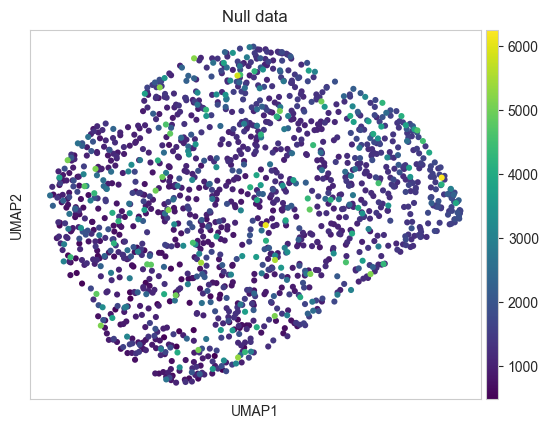

In [240]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [308]:
res2 = 0.01
twoclust = False
#345 vs. 456

while twoclust is False:
    if (res2 * 100)%5 == 0:
        print(res2)
    res2 += 0.005
    res2 = np.round(res2, 3)
    sc.tl.leiden(data_null_gen, resolution=res2, key_added="leiden", random_state=None)
    nclust = len(data_null_gen.obs["leiden"].unique())
    if nclust == 2:
        twoclust = True
    
    
print(f"Resolution for two clusters: {res2}")

0.05
Resolution for two clusters: 0.09


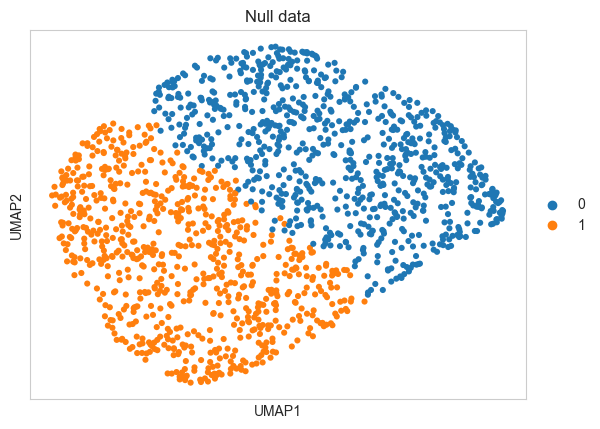

In [309]:
sc.pl.umap(data_null_gen, color="leiden", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [310]:
# data_null_gen.write("../../data/MOBA_scRNAseq/outs_S3/S3_null_data_opt.h5ad")


In [311]:
X_null_gen_0 = data_null_gen.X[data_null_gen.obs["leiden"] == "0"]
X_null_gen_1 = data_null_gen.X[data_null_gen.obs["leiden"] != "0"]

pval_null_gen = pd.DataFrame({"pval_null": ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue}, index=data_null_gen.var.index)

clusters = data_gene.obs["leiden_opt"].unique()

In [312]:
importlib.reload(cd)
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 0 - DE genes: 0; Minimum q value: 0.7293185419968304
Cluster 1 - DE genes: 74; Minimum q value: 0.017543859649122806
Cluster 2 - DE genes: 62; Minimum q value: 0.01694915254237288
Cluster 3 - DE genes: 0; Minimum q value: 0.08333333333333333


In [313]:
DEs_gen = {}
pvals_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=False)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_gen[c] = DE_TU
    pvals_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_gen[c])}; Minimum q value: {np.min(pvals_gen[c]['q'])}")

Cluster 0 - DE genes: 0; Minimum q value: 0.11912751677852348
Cluster 1 - DE genes: 0; Minimum q value: 1.0
Cluster 2 - DE genes: 2371; Minimum q value: 0.04389212057112639
Cluster 3 - DE genes: 0; Minimum q value: 1.0


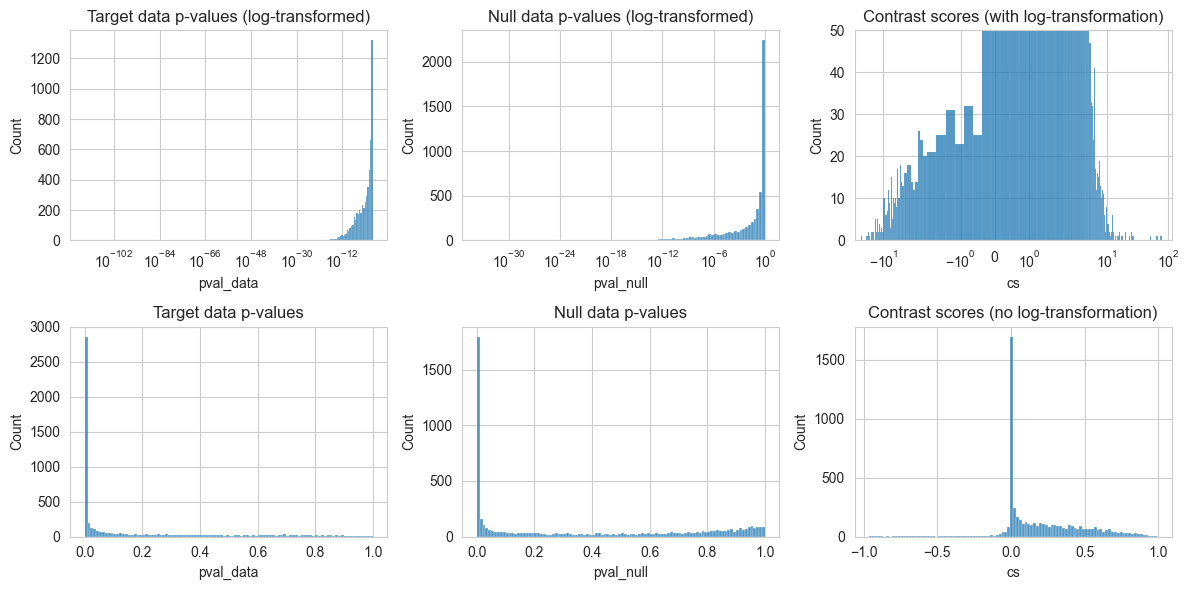

In [314]:
c = "2"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog", ylim=(0, 50))

sns.histplot(pvals_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (no log-transformation)")


plt.tight_layout()
plt.show()

In [315]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 0
q
0.729319    3155
0.729721       1
0.729807       1
0.730144      41
0.731022       3
0.731106       1
0.731190       1
0.731273       1
1.000000    2342
Name: count, dtype: int64

cluster 1
q
0.017544      57
0.030303       9
0.040541       8
0.065789       2
0.075949       3
0.086420       2
0.097561       1
0.108434       1
0.130952       1
0.162791       2
0.241379       1
0.250000       1
0.258427       1
0.329670       2
0.391304       1
0.709677       1
0.723404       1
1.000000    5452
Name: count, dtype: int64

cluster 2
q
0.016949      59
0.032258       3
0.063492       1
0.140625       1
0.146401    4451
            ... 
0.162747       3
0.162923       1
0.163518       1
0.163625       3
1.000000     779
Name: count, Length: 69, dtype: int64

cluster 3
q
0.083333      12
0.105263       7
0.130435       4
0.166667       1
0.200000       1
0.230769       1
0.296296       1
0.357143       1
0.482759       1
1.000000    5517
Name: count, dtype: int64


In [316]:
pvals_log_gen["1"]

pval_data     pval_null  pval_trafo_data  pval_trafo_null  \
PAO1_ID                                                                  
PA4262   4.022592e-143  1.592631e-03       142.395494         2.797885   
PA4260   6.089935e-142  7.555161e-05       141.215387         4.121756   
PA4256   2.037091e-136  4.593241e-03       135.690990         2.337881   
PA4251   1.283188e-130  1.334619e-03       129.891710         2.874643   
PA4261   5.770388e-126  3.708362e-01       125.238795         0.430818   
...                ...           ...              ...              ...   
PA1342    2.440460e-01  4.386971e-21         0.612528        20.357835   
PA2641    4.326250e-02  3.475356e-22         1.363888        21.459001   
PA2649    8.287019e-01  4.582112e-21         0.081602        20.338934   
PA1838    3.416836e-01  2.885626e-27         0.466376        26.539760   
PA5315    6.683420e-01  1.897919e-34         0.175001        33.721722   

                 cs         q  
PAO1_ID                        
PA4262   139.597609  0.017544  
PA4260   137.093631  0.017544  
PA4256   133.353109  0.017544  
PA4251   127.017067  0.017544  
PA4261   124.807977  0.017544  
...             ...       ...  
PA1342   -19.745307  1.000000  
PA2641   -20.095112  1.000000  
PA2649   -20.257333  1.000000  
PA1838   -26.073384  1.000000  
PA5315   -33.546721  1.000000  

[5546 rows x 6 columns]

In [317]:
pvals_log_gen["0"]

pval_data     pval_null  pval_trafo_data  pval_trafo_null  \
PAO1_ID                                                                 
PA4244   1.382737e-19  2.132869e-01        18.859260         0.671036   
PA4255   5.606549e-14  7.060248e-01        13.251304         0.151180   
PA4261   6.799844e-11  3.708362e-01        10.167501         0.430818   
PA4385   6.913448e-11  2.864205e-02        10.160305         1.542996   
PA0636   3.708294e-09  7.262006e-01         8.430826         0.138943   
...               ...           ...              ...              ...   
PA4672   2.262338e-01  6.804908e-20         0.645443        19.167178   
PA4854   3.018989e-02  1.546808e-21         1.520138        20.810563   
PA5315   1.530448e-13  1.897919e-34        12.815181        33.721722   
PA1838   1.899438e-05  2.885626e-27         4.721375        26.539760   
PA5490   2.076414e-02  2.856617e-24         1.682686        23.544148   

                cs         q  
PAO1_ID                       
PA4244   18.188224  0.729319  
PA4255   13.100124  0.729319  
PA4261    9.736683  0.729319  
PA4385    8.617309  0.729319  
PA0636    8.291882  0.729319  
...            ...       ...  
PA4672  -18.521735  1.000000  
PA4854  -19.290425  1.000000  
PA5315  -20.906541  1.000000  
PA1838  -21.818385  1.000000  
PA5490  -21.861462  1.000000  

[5546 rows x 6 columns]

['PA4264', 'PA4260', 'PA4262', 'PA4256', 'PA4251', 'PA4267', 'PA4252', 'PA4274', 'PA4250', 'PA5556']


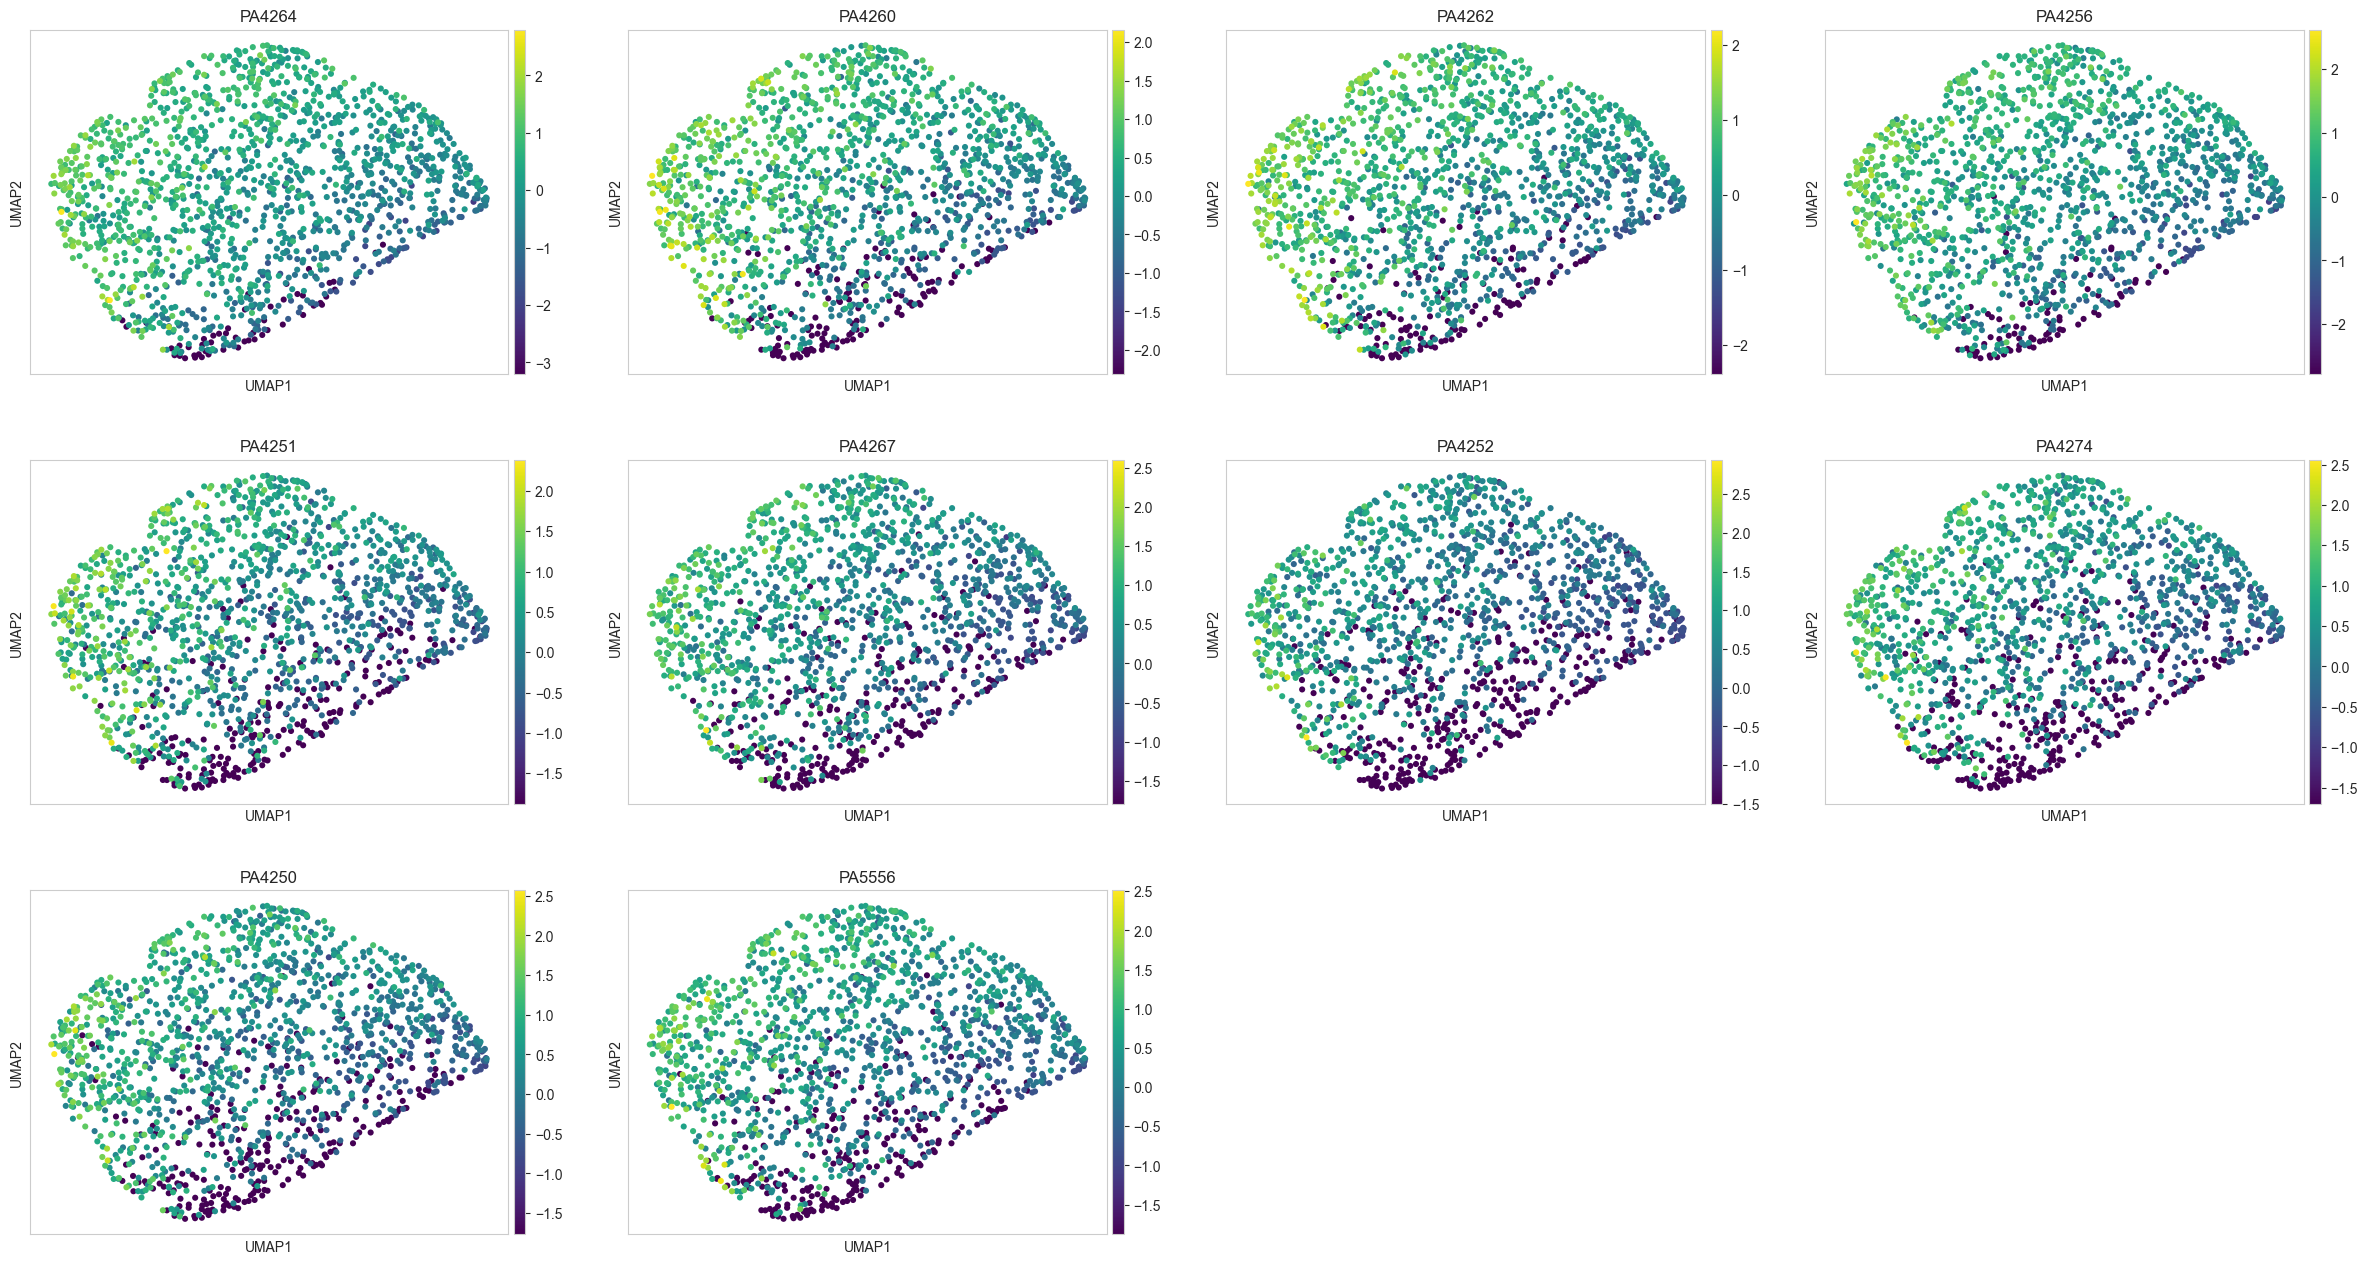

In [251]:
# goi = pvals_log_gen["3"].sort_values("pval_null", ascending=True).index[:10]
goi = ['PA4264', 'PA4260', 'PA4262', 'PA4256', 'PA4251', 'PA4267', 'PA4252',
       'PA4274', 'PA4250', 'PA5556']
print(goi)

sc.pl.umap(data_null_gen, color=goi, cmap="viridis")

## Testing...

In [291]:
nb_est_df_unscaled = ((data_null_gen.var.reset_index()[["nb_mean_unscaled", "nb_overdisp_unscaled", "nb_overdisp_cutoff_unscaled", "mean_counts_unscaled", "var_counts_unscaled", "PAO1_ID", "nb_umi_unscaled", "Intercept_step1_sct_unscaled", "log_umi_step1_sct_unscaled", "dispersion_step1_sct_unscaled", "total_counts_unscaled"]]))
nb_est_df_unscaled.columns = ["nb_mean", "nb_overdisp", "nb_overdisp_cutoff", "mean_counts", "var_counts", "PAO1_ID", "nb_umi", "Intercept_step1_sct", "log_umi_step1_sct", "dispersion_step1_sct", "total_counts"]
nb_est_df_unscaled["type"] = "null_unscaled"

nb_est_df_null = data_null_gen.var.reset_index()[["nb_mean", "nb_overdisp", "nb_overdisp_cutoff", "mean_counts", "var_counts", "n_cells_by_counts", "PAO1_ID", "nb_umi", "Intercept_step1_sct", "log_umi_step1_sct", "dispersion_step1_sct", "total_counts"]]
nb_est_df_null["type"] = "null_scaled"

nb_est_df_gene = data_gene.var[["nb_mean", "nb_overdisp", "nb_overdisp_cutoff", "mean_counts", "var_counts", "n_cells_by_counts", "PAO1_ID", "nb_umi", "Intercept_step1_sct", "log_umi_step1_sct", "dispersion_step1_sct", "total_counts"]]
nb_est_df_gene["type"] = "real"

nb_est_df = pd.concat([nb_est_df_null, nb_est_df_gene, nb_est_df_unscaled]).reset_index()
nb_est_df

index   nb_mean  nb_overdisp  nb_overdisp_cutoff  mean_counts  \
0         0 -7.613363     1.378310            1.378310     0.885363   
1         1 -7.862312     0.864735            0.864735     0.598446   
2         2 -7.461064     1.693212            1.693212     1.038860   
3         3 -7.950617     0.674156            0.674156     0.495466   
4         4 -8.421236     0.203886            0.203886     0.212435   
...     ...       ...          ...                 ...          ...   
16640  5541 -5.812312     0.103445            0.103445     0.012306   
16641  5542 -7.116011     0.851984            0.851984     0.147668   
16642  5543 -8.549095     5.568968            5.568968     0.642487   
16643  5544 -7.624991     3.579093            3.579093     3.599741   
16644  5545 -8.370471     3.775255            3.775255     0.471503   

       var_counts  n_cells_by_counts PAO1_ID    nb_umi  Intercept_step1_sct  \
0        2.418853              729.0  PA0001  2.338451                  NaN   
1        1.363365              555.0  PA0002  2.304435                  NaN   
2        2.243309              832.0  PA0003  2.351761                  NaN   
3        1.033658              478.0  PA0004  2.277526            -8.085530   
4        0.461348              203.0  PA0005  2.158279            -9.356543   
...           ...                ...     ...       ...                  ...   
16640    0.013450                NaN  PA5566  0.451529            -6.783261   
16641    0.197106                NaN  PA5567  1.671022            -7.806692   
16642    0.703791                NaN  PA5568  2.614929                  NaN   
16643   12.061295                NaN  PA5569  2.859447            -8.971970   
16644    0.795820                NaN  PA5570  2.426390                  NaN   

       log_umi_step1_sct  dispersion_step1_sct  total_counts           type  
0                    NaN                   NaN        1367.0    null_scaled  
1                    NaN                   NaN         924.0    null_scaled  
2                    NaN                   NaN        1604.0    null_scaled  
3               2.310471              0.132639         765.0    null_scaled  
4               2.440548              0.185531         328.0    null_scaled  
...                  ...                   ...           ...            ...  
16640           0.776778              0.027348          19.0  null_unscaled  
16641           1.902440              0.083684         228.0  null_unscaled  
16642                NaN                   NaN         992.0  null_unscaled  
16643           3.277005              0.115653        5558.0  null_unscaled  
16644                NaN                   NaN         728.0  null_unscaled  

[16645 rows x 14 columns]

In [296]:
nb_est_df["nb_est"] = np.exp(nb_est_df["Intercept_step1_sct"] + nb_est_df["log_umi_step1_sct"] * np.log10(nb_est_df["total_counts"]))
nb_est_df["nb_est_smoothed"] = np.exp(nb_est_df["nb_mean"] + nb_est_df["nb_umi"] * np.log10(nb_est_df["total_counts"]))


[None, None]

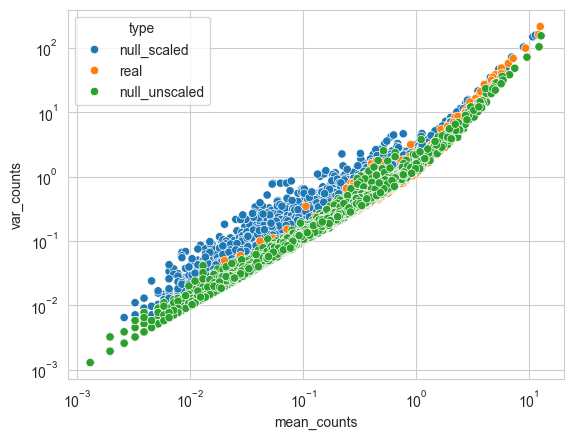

In [322]:
g = sns.scatterplot(nb_est_df, x="mean_counts", y="var_counts", hue="type")
g.set(xscale="log", yscale="log")

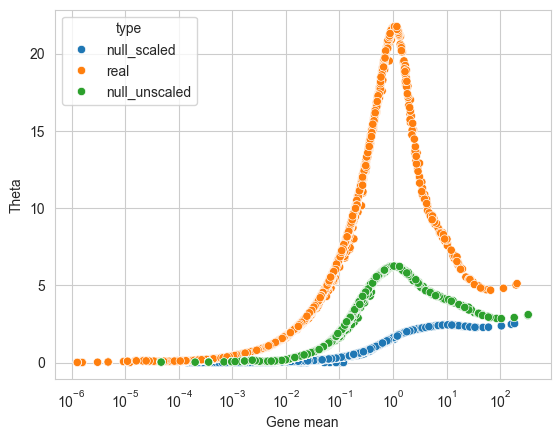

In [300]:
g = sns.scatterplot(data=nb_est_df, y="nb_overdisp_cutoff", x="nb_est_smoothed", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("Theta")
plt.show()

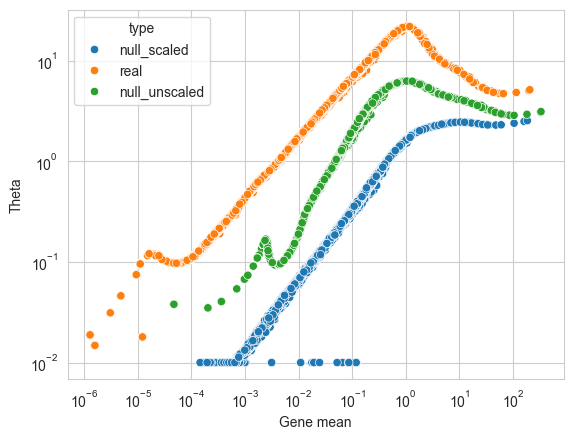

In [301]:
g = sns.scatterplot(data=nb_est_df, y="nb_overdisp_cutoff", x="nb_est_smoothed", hue="type")
g.set(xscale="log", yscale="log")
plt.xlabel("Gene mean")
plt.ylabel("Theta")
plt.show()

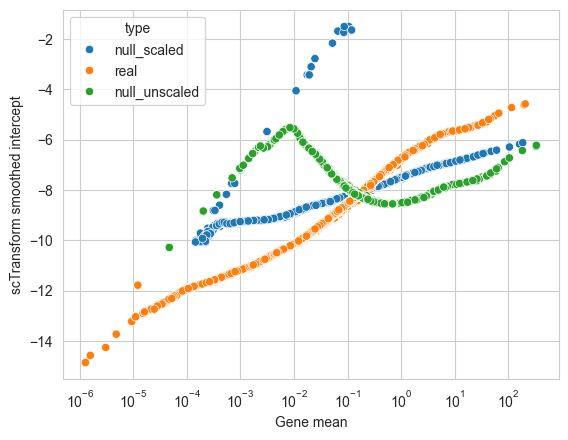

In [303]:
g = sns.scatterplot(data=nb_est_df, y="nb_mean", x="nb_est_smoothed", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform smoothed intercept")
plt.show()

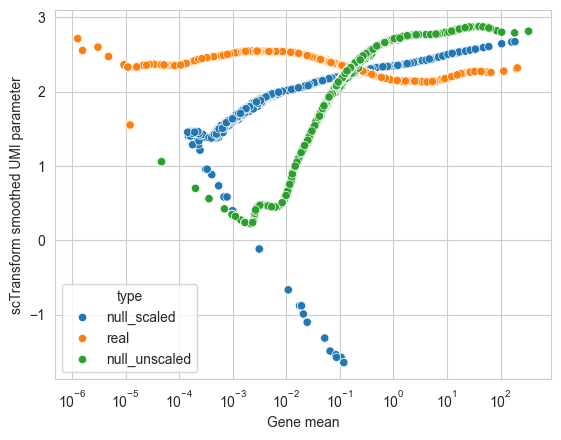

In [304]:
g = sns.scatterplot(data=nb_est_df, y="nb_umi", x="nb_est_smoothed", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform smoothed UMI parameter")
plt.show()

In [318]:
nb_est_df[(nb_est_df["nb_umi"] < 1) & (nb_est_df["type"] == "null_scaled")]

index   nb_mean  nb_overdisp  nb_overdisp_cutoff  mean_counts  \
51      51 -1.635475    -0.141630                0.01     0.001295   
437    437 -1.498209     0.005746                0.01     0.001943   
564    564 -8.813436     0.003238                0.01     0.004534   
680    680 -8.813436     0.003238                0.01     0.003886   
732    732 -8.813436     0.003238                0.01     0.003886   
840    840 -1.498209     0.005746                0.01     0.001943   
1207  1207 -7.193213     0.003188                0.01     0.003886   
1231  1231 -1.498209     0.005746                0.01     0.001943   
1486  1486 -7.736513     0.003187                0.01     0.003886   
1887  1887 -5.675516     0.003252                0.01     0.003238   
1917  1917 -8.813436     0.003238                0.01     0.003886   
1992  1992 -8.604221     0.003220                0.01     0.005181   
2087  2087 -8.813436     0.003238                0.01     0.004534   
2130  2130 -8.173742     0.003197                0.01     0.005181   
2136  2136 -7.193213     0.003188                0.01     0.003238   
2139  2139 -3.421015     0.003551                0.01     0.003238   
2144  2144 -1.679072     0.004578                0.01     0.003238   
2148  2148 -3.421015     0.003551                0.01     0.002591   
2153  2153 -8.813436     0.003238                0.01     0.004534   
2155  2155 -1.635475    -0.141630                0.01     0.001295   
2293  2293 -3.097091     0.003633                0.01     0.003886   
2294  2294 -1.498209     0.005746                0.01     0.001943   
2338  2338 -1.498209     0.005746                0.01     0.001943   
2456  2456 -8.813436     0.003238                0.01     0.003886   
2469  2469 -3.421015     0.003551                0.01     0.002591   
2489  2489 -1.635475    -0.141630                0.01     0.001295   
2499  2499 -3.421015     0.003551                0.01     0.002591   
2668  2668 -1.498209     0.005746                0.01     0.001943   
2725  2725 -1.498209     0.005746                0.01     0.001943   
2767  2767 -4.051503     0.003430                0.01     0.003238   
2908  2908 -7.736513     0.003187                0.01     0.003886   
3216  3216 -5.675516     0.003252                0.01     0.003238   
3373  3373 -4.051503     0.003430                0.01     0.003238   
3382  3382 -1.635475    -0.141630                0.01     0.001295   
3519  3519 -5.675516     0.003252                0.01     0.003886   
3555  3555 -4.051503     0.003430                0.01     0.003238   
3578  3578 -1.729930     0.009444                0.01     0.001943   
4075  4075 -8.813436     0.003238                0.01     0.004534   
4120  4120 -2.159421     0.004036                0.01     0.002591   
4268  4268 -2.773494     0.003735                0.01     0.004534   
4523  4523 -1.635475    -0.141630                0.01     0.001295   
4584  4584 -7.736513     0.003187                0.01     0.006477   
5243  5243 -1.498209     0.005746                0.01     0.002591   

      var_counts  n_cells_by_counts  PAO1_ID    nb_umi  Intercept_step1_sct  \
51      0.001294                2.0   PA0050 -1.643960             6.876124   
437     0.001939                3.0   PA0439 -1.573718             3.771408   
564     0.009694                4.0   PA0567  0.957111           -14.737369   
680     0.005166                5.0   PA0685  0.957111           -13.916048   
732     0.005166                5.0  PA0736a  0.957111           -14.111000   
840     0.001939                3.0   PA0845 -1.573718            -2.522314   
1207    0.007757                4.0   PA1213  0.398092           -14.275632   
1231    0.001939                3.0   PA1237 -1.573718            -3.162927   
1486    0.006462                4.0   PA1491  0.583769            -4.290811   
1887    0.004523                4.0   PA1888 -0.116719           -15.238602   
1917    0.005166                5.0   PA1922  0.957111 

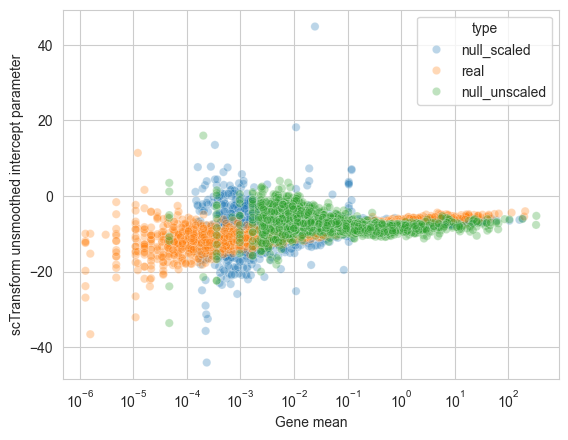

In [305]:
g = sns.scatterplot(data=nb_est_df, y="Intercept_step1_sct", x="nb_est_smoothed", hue="type", alpha=0.3)
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform unsmoothed intercept parameter")
plt.show()

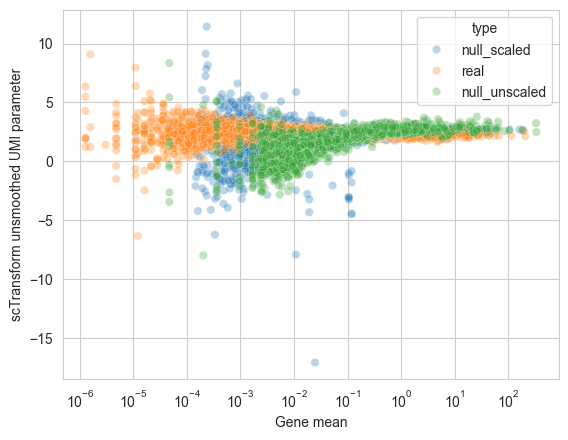

In [306]:
g = sns.scatterplot(data=nb_est_df, y="log_umi_step1_sct", x="nb_est_smoothed", hue="type", alpha=0.3)
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform unsmoothed UMI parameter")
plt.show()

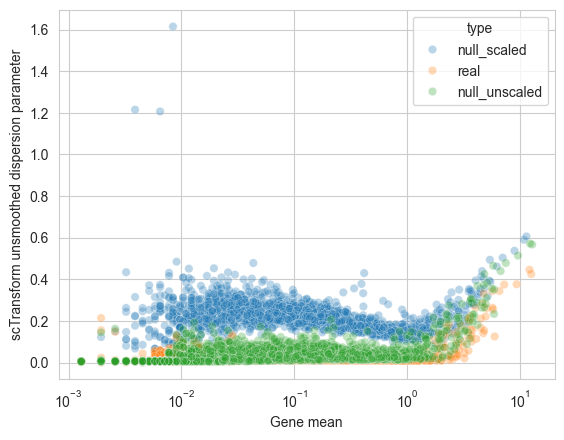

In [319]:
g = sns.scatterplot(data=nb_est_df, y="dispersion_step1_sct", x="mean_counts", hue="type", alpha=0.3)
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform unsmoothed dispersion parameter")
plt.show()

In [282]:
nb_est_df_paired = nb_est_df.pivot(index="PAO1_ID", columns="type")
nb_est_df_paired.columns = ['_'.join(col).strip() for col in nb_est_df_paired.columns.values]
nb_est_df_paired

index_null_scaled index_null_unscaled index_real  nb_mean_null_scaled  \
PAO1_ID                                                                         
PA0001                  0                   0     PA0001            -7.613363   
PA0002                  1                   1     PA0002            -7.862312   
PA0003                  2                   2     PA0003            -7.461064   
PA0004                  3                   3     PA0004            -7.950617   
PA0005                  4                   4     PA0005            -8.421236   
...                   ...                 ...        ...                  ...   
PA5566               5541                5541     PA5566            -9.257338   
PA5567               5542                5542     PA5567            -8.462275   
PA5568               5543                5543     PA5568            -7.665811   
PA5569               5544                5544     PA5569            -6.806202   
PA5570               5545                5545     PA5570            -7.934401   

         nb_mean_null_unscaled  nb_mean_real  nb_overdisp_null_scaled  \
PAO1_ID                                                                 
PA0001               -8.555143     -7.104036                 1.378310   
PA0002               -8.461460     -7.709383                 0.864735   
PA0003               -8.509668     -6.669634                 1.693212   
PA0004               -8.314597     -8.051578                 0.674156   
PA0005               -7.145612     -9.842994                 0.203886   
...                        ...           ...                      ...   
PA5566               -5.812312    -11.919682                 0.013268   
PA5567               -7.116011     -9.835550                 0.184945   
PA5568               -8.549095     -7.111111                 1.273077   
PA5569               -7.624991     -5.564520                 2.436166   
PA5570               -8.370471     -7.811275                 0.707585   

         nb_overdisp_null_unscaled  nb_overdisp_real  \
PAO1_ID                                                
PA0001                    5.839926         18.563001   
PA0002                    4.517145         12.341271   
PA0003                    6.254566         21.748395   
PA0004                    3.400807          9.686403   
PA0005                    0.871806          2.331796   
...                            ...               ...   
PA5566                    0.103445          0.112193   
PA5567                    0.851984          2.347852   
PA5568                    5.568968         18.485174   
PA5569                    3.579093          6.551408   
PA5570                    3.775255         11.488086   

         nb_overdisp_cutoff_null_scaled  ...  Intercept_step1_sct_real  \
PAO1_ID                                  ...                             
PA0001                         1.378310  ...                 -6.941972   
PA0002                         0.864735  ...                       NaN   
PA0003                         1.693212  ...                 -6.444100   
PA0004                         0.674156  ...                 -8.528122   
PA0005                         0.203886  ...                       NaN   
...                                 ...  ...                       ...   
PA5566                         0.013268  ...                       NaN   
PA5567                         0.184945  ...                 -9.934617   
PA5568                         1.273077  ...                       NaN   
PA5569                         2.436166  ...                 -6.188664   
PA5570                         0.707585  ...                       NaN   

         log_umi_step1_sct_null_scaled  log_umi_step1_sct_null_unscaled  \
PAO1_ID                                                                   
PA0001                             NaN                              NaN   
PA0002                             NaN                              NaN   
PA0003      

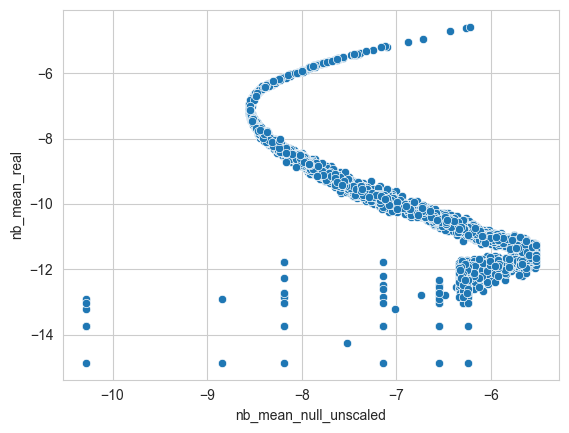

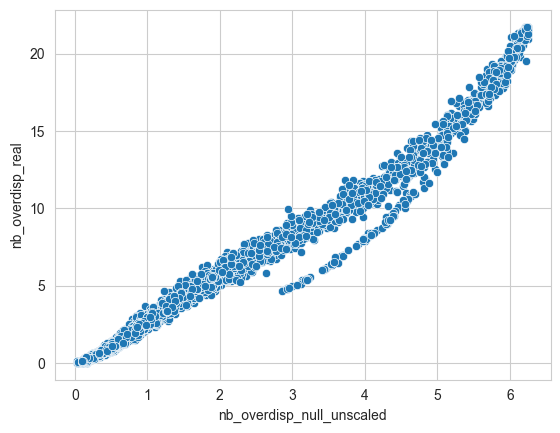

In [283]:
sns.scatterplot(nb_est_df_paired, x="nb_mean_null_unscaled", y="nb_mean_real")
plt.show()

sns.scatterplot(nb_est_df_paired, x="nb_overdisp_null_unscaled", y="nb_overdisp_real")
plt.show()

In [284]:
nb_est_df_paired["nb_est_real"] = nb_est_df_paired["Intercept_step1_sct_real"] + nb_est_df_paired["log_umi_step1_sct_real"] * np.log10(nb_est_df_paired["total_counts_real"])
nb_est_df_paired["nb_est_null_scaled"] = nb_est_df_paired["Intercept_step1_sct_null_scaled"] + nb_est_df_paired["log_umi_step1_sct_null_scaled"] * np.log10(nb_est_df_paired["total_counts_null_scaled"])
nb_est_df_paired["nb_est_null_unscaled"] = nb_est_df_paired["Intercept_step1_sct_null_unscaled"] + nb_est_df_paired["log_umi_step1_sct_null_unscaled"] * np.log10(nb_est_df_paired["total_counts_null_unscaled"])

nb_est_df_paired["nb_est_real_smoothed"] = nb_est_df_paired["nb_mean_real"] + nb_est_df_paired["nb_umi_real"] * np.log10(nb_est_df_paired["total_counts_real"])
nb_est_df_paired["nb_est_null_scaled_smoothed"] = nb_est_df_paired["nb_mean_null_scaled"] + nb_est_df_paired["nb_umi_null_scaled"] * np.log10(nb_est_df_paired["total_counts_null_scaled"])
nb_est_df_paired["nb_est_null_unscaled_smoothed"] = nb_est_df_paired["nb_mean_null_unscaled"] + nb_est_df_paired["nb_umi_null_unscaled"] * np.log10(nb_est_df_paired["total_counts_null_unscaled"])

nb_est_df_paired

index_null_scaled index_null_unscaled index_real  nb_mean_null_scaled  \
PAO1_ID                                                                         
PA0001                  0                   0     PA0001            -7.613363   
PA0002                  1                   1     PA0002            -7.862312   
PA0003                  2                   2     PA0003            -7.461064   
PA0004                  3                   3     PA0004            -7.950617   
PA0005                  4                   4     PA0005            -8.421236   
...                   ...                 ...        ...                  ...   
PA5566               5541                5541     PA5566            -9.257338   
PA5567               5542                5542     PA5567            -8.462275   
PA5568               5543                5543     PA5568            -7.665811   
PA5569               5544                5544     PA5569            -6.806202   
PA5570               5545                5545     PA5570            -7.934401   

         nb_mean_null_unscaled  nb_mean_real  nb_overdisp_null_scaled  \
PAO1_ID                                                                 
PA0001               -8.555143     -7.104036                 1.378310   
PA0002               -8.461460     -7.709383                 0.864735   
PA0003               -8.509668     -6.669634                 1.693212   
PA0004               -8.314597     -8.051578                 0.674156   
PA0005               -7.145612     -9.842994                 0.203886   
...                        ...           ...                      ...   
PA5566               -5.812312    -11.919682                 0.013268   
PA5567               -7.116011     -9.835550                 0.184945   
PA5568               -8.549095     -7.111111                 1.273077   
PA5569               -7.624991     -5.564520                 2.436166   
PA5570               -8.370471     -7.811275                 0.707585   

         nb_overdisp_null_unscaled  nb_overdisp_real  \
PAO1_ID                                                
PA0001                    5.839926         18.563001   
PA0002                    4.517145         12.341271   
PA0003                    6.254566         21.748395   
PA0004                    3.400807          9.686403   
PA0005                    0.871806          2.331796   
...                            ...               ...   
PA5566                    0.103445          0.112193   
PA5567                    0.851984          2.347852   
PA5568                    5.568968         18.485174   
PA5569                    3.579093          6.551408   
PA5570                    3.775255         11.488086   

         nb_overdisp_cutoff_null_scaled  ...  dispersion_step1_sct_real  \
PAO1_ID                                  ...                              
PA0001                         1.378310  ...                   0.009296   
PA0002                         0.864735  ...                        NaN   
PA0003                         1.693212  ...                   0.008896   
PA0004                         0.674156  ...                   0.009515   
PA0005                         0.203886  ...                        NaN   
...                                 ...  ...                        ...   
PA5566                         0.013268  ...                        NaN   
PA5567                         0.184945  ...                   0.029657   
PA5568                         1.273077  ...                        NaN   
PA5569                         2.436166  ...                   0.057214   
PA5570                         0.707585  ...                        NaN   

         total_counts_null_scaled  total_counts_null_unscaled  \
PAO1_ID                                                         
PA0001                     1367.0                      1100.0   
PA0002                      924.0                       809.0   
PA0003                     1604.0      

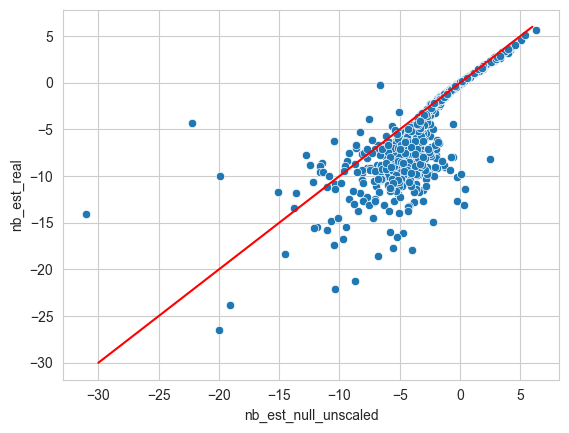

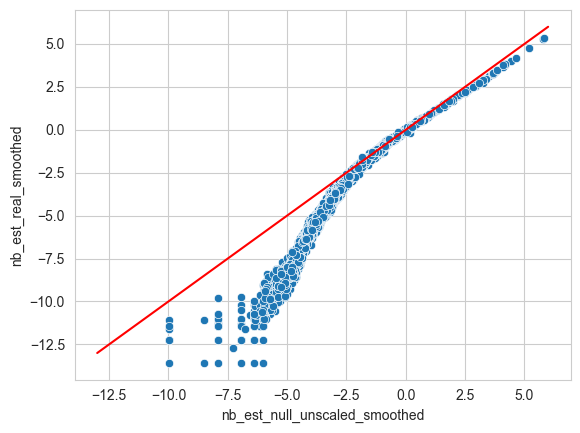

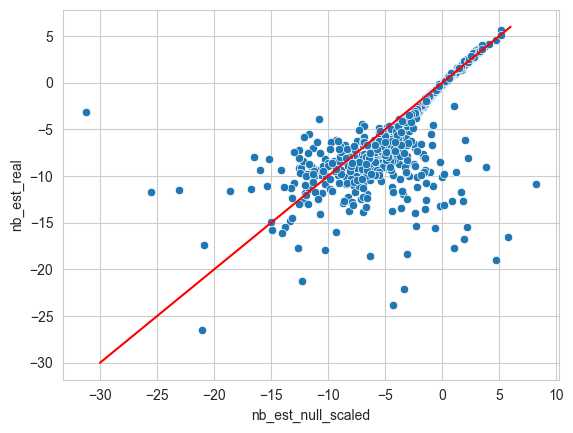

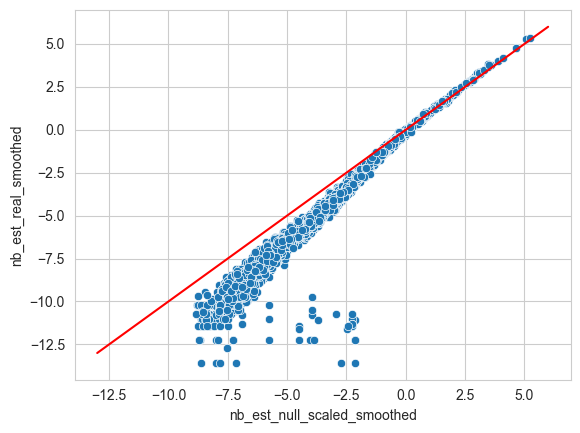

In [285]:
g = sns.scatterplot(nb_est_df_paired, x="nb_est_null_unscaled", y="nb_est_real")
g.plot([-30, 6], [-30, 6], color="red")

plt.show()

g = sns.scatterplot(nb_est_df_paired, x="nb_est_null_unscaled_smoothed", y="nb_est_real_smoothed")
g.plot([-13, 6], [-13, 6], color="red")
plt.show()

g = sns.scatterplot(nb_est_df_paired, x="nb_est_null_scaled", y="nb_est_real")
g.plot([-30, 6], [-30, 6], color="red")

plt.show()

g = sns.scatterplot(nb_est_df_paired, x="nb_est_null_scaled_smoothed", y="nb_est_real_smoothed")
g.plot([-13, 6], [-13, 6], color="red")
plt.show()

In [286]:
data_null_gen.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAGTGGACCTC-1               1259                 7.138867        1379.0   
AAACCCATCCTGTAGA-1               1493                 7.309212        1744.0   
AAACGCTCAGATTTCG-1                526                 6.267201         783.0   
AAACGCTTCTTTGCTA-1                545                 6.302619        1375.0   
AAAGAACCAGTCTGGC-1                932                 6.838405        1428.0   
...                               ...                      ...           ...   
TTTGATCTCCTCGCAT-1               1014                 6.922644        1493.0   
TTTGGAGCACCGAATT-1                709                 6.565265        5508.0   
TTTGGAGCAGCAGTTT-1                443                 6.095825        1002.0   
TTTGGTTTCGTTGTGA-1                865                 6.763885        1007.0   
TTTGTTGAGTAATACG-1                756                 6.629363        2785.0   

                    log1p_total_counts leiden  
AAACCCAGTGGACCTC-1            7.229839      1  
AAACCCATCCTGTAGA-1            7.464510      1  
AAACGCTCAGATTTCG-1            6.664409      0  
AAACGCTTCTTTGCTA-1            7.226936      0  
AAAGAACCAGTCTGGC-1            7.264730      1  
...                                ...    ...  
TTTGATCTCCTCGCAT-1            7.309212      1  
TTTGGAGCACCGAATT-1            8.614138      1  
TTTGGAGCAGCAGTTT-1            6.910751      0  
TTTGGTTTCGTTGTGA-1            6.915723      1  
TTTGTTGAGTAATACG-1            7.932362      0  

[1544 rows x 5 columns]

In [287]:
cell_df_null = data_null_gen.obs.reset_index()[["total_counts", "n_genes_by_counts"]]
cell_df_null["type"] = "null"
cell_df_gene = data_gene.obs[["total_counts", "n_genes_by_counts"]]
cell_df_gene["type"] = "real"

cell_df = pd.concat([cell_df_gene, cell_df_null])

<Axes: xlabel='total_counts', ylabel='Count'>

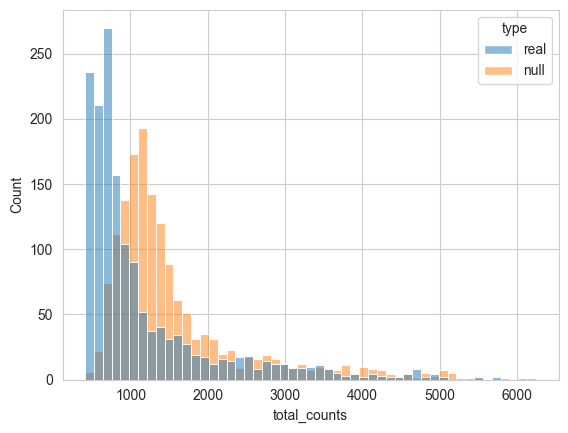

In [288]:
sns.histplot(cell_df, x="total_counts", hue="type")

In [289]:
# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_counts = pd.DataFrame({"count_orig": data_gene_nonzero.layers["counts"].toarray().flatten(), "count_gen": data_null_gen.layers["counts"].flatten()})
count_pairs = all_counts.groupby(['count_orig','count_gen']).size().reset_index().rename(columns={0:'count'})
count_pairs["log_count"] = np.log(count_pairs["count"])
count_pairs = count_pairs.pivot(index="count_gen", columns="count_orig", values="log_count")
count_pairs


count_orig      0.0        1.0        2.0        3.0       4.0       5.0    \
count_gen                                                                    
0.0         15.692543  13.361837  11.672175  10.088638  8.978913  8.072467   
1.0         13.396948  11.976238  10.620595   9.345832  8.398860  7.667626   
2.0         11.835321  10.833583   9.721666   8.674368  7.908755  7.280008   
3.0         10.465814   9.809452   8.899867   8.075583  7.441907  6.916715   
4.0          9.251866   8.924257   8.256867   7.596894  7.016610  6.439350   
...               ...        ...        ...        ...       ...       ...   
72.0              NaN        NaN   0.000000        NaN       NaN       NaN   
73.0              NaN        NaN        NaN        NaN       NaN       NaN   
79.0              NaN        NaN        NaN        NaN       NaN       NaN   
81.0              NaN        NaN        NaN   0.000000       NaN       NaN   
84.0              NaN        NaN        NaN        NaN       NaN       NaN   

count_orig     6.0       7.0       8.0       9.0    ...  99.0   100.0  101.0  \
count_gen                                           ...                        
0.0         7.407924  6.830874  6.406880  6.028279  ...    NaN    NaN    NaN   
1.0         7.093405  6.565265  6.196444  5.805135  ...    NaN    NaN    NaN   
2.0         6.701960  6.378426  5.918894  5.480639  ...    NaN    0.0    NaN   
3.0         6.418365  5.924256  5.616771  5.257495  ...    NaN    NaN    NaN   
4.0         6.063785  5.669881  5.370638  5.049856  ...    NaN    NaN    0.0   
...              ...       ...       ...       ...  ...    ...    ...    ...   
72.0             NaN       NaN       NaN       NaN  ...    NaN    NaN    NaN   
73.0             NaN       NaN       NaN       NaN  ...    NaN    NaN    NaN   
79.0             NaN       NaN       NaN       NaN  ...    NaN    NaN    NaN   
81.0             NaN       NaN       NaN       NaN  ...    NaN    NaN    NaN   
84.0             NaN       NaN  0.000000       NaN  ...    NaN    NaN    NaN   

count_orig  102.0  103.0  104.0  107.0  114.0  129.0  136.0  
count_gen                                                    
0.0           NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1.0           NaN    NaN    NaN    NaN    NaN    NaN    0.0  
2.0           NaN    NaN    NaN    NaN    NaN    0.0    NaN  
3.0           NaN    NaN    NaN    0.0    NaN    NaN    NaN  
4.0           NaN    NaN    0.0    NaN    NaN    NaN    NaN  
...           ...    ...    ...    ...    ...    ...    ...  
72.0          NaN    NaN    NaN    NaN    NaN    NaN    NaN  
73.0          NaN    NaN    NaN    NaN    NaN    NaN    NaN  
79.0          NaN    NaN    NaN    NaN    NaN    NaN    NaN  
81.0          NaN    NaN    NaN    NaN    NaN    NaN    NaN  
84.0          NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[71 rows x 102 columns]

In [290]:
all_counts.reset_index()

index  count_orig  count_gen
0              0         0.0        0.0
1              1         0.0        0.0
2              2         0.0        1.0
3              3         0.0        0.0
4              4         0.0        1.0
...          ...         ...        ...
8563019  8563019         0.0        0.0
8563020  8563020         0.0        0.0
8563021  8563021         1.0        1.0
8563022  8563022         6.0        3.0
8563023  8563023         0.0        0.0

[8563024 rows x 3 columns]

In [270]:
all_counts_long = pd.wide_to_long(all_counts.reset_index(), stubnames="count", i="index", j="type", sep="_", suffix=r'\w+').reset_index()
all_counts_long

index  type  count
0               0  orig    0.0
1               1  orig    0.0
2               2  orig    0.0
3               3  orig    0.0
4               4  orig    0.0
...           ...   ...    ...
17126043  8563019   gen    0.0
17126044  8563020   gen    0.0
17126045  8563021   gen    1.0
17126046  8563022   gen    3.0
17126047  8563023   gen    0.0

[17126048 rows x 3 columns]

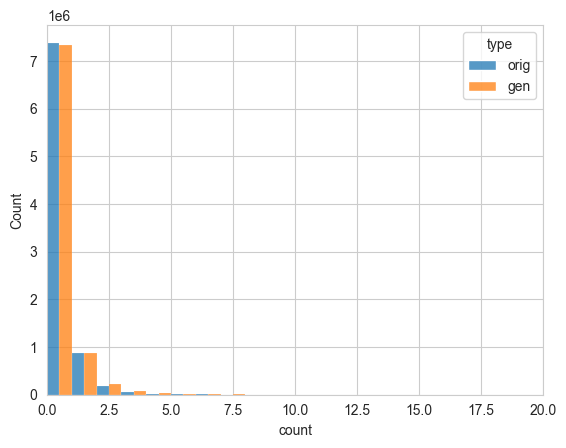

In [271]:
g = sns.histplot(all_counts_long, x="count", hue="type", binwidth=1, multiple="dodge")
g.set(xlim=(0, 20))
plt.show()